# Hábitos de Jogo da Turma TPSIP 11.23

O presente estudo visa entender os hábitos de jogo dos alunos e professora da turma TPSIP 11.23. A análise é baseada em três variáveis, horas de jogo diárias, quantidade de jogos testados ao longo deste ano e os géneros preferidos. Esta análise serve para entender melhor o comportamento da turma em relação ao tema.

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [19]:
# Funções Auxiliares

# Calcular Frequência 
def calculate_frequencies(column):
    if column.dtype == 'object':
        absolute_freq = column.value_counts().sort_index()
    else:
        absolute_freq = column.value_counts().sort_index()
    
    relative_freq = absolute_freq / len(column)
    cumulative_abs_freq = absolute_freq.cumsum()
    cumulative_rel_freq = relative_freq.cumsum()
    
    return pd.DataFrame({
        'Frequência Absoluta ': absolute_freq,
        'Frequência Absoluta Acumulada': cumulative_abs_freq,
        
        'Frequência Relativa': relative_freq,
        'Frequência Relativa Acumulada': cumulative_rel_freq
    })

# Calcular média, moda, mediana, quartis, extremos e amplitude
def calculate_statistics(column):
    return pd.Series({
        'Média': column.mean(),
        'Moda': stats.mode(column, keepdims=False)[0],
        'Mediana': column.median(),
        'Q1 (25%)': column.quantile(0.25),
        'Q2 (50%)': column.quantile(0.50),
        'Q3 (75%)': column.quantile(0.75),
        'Mínimo': column.min(),
        'Máximo': column.max(),
        'Amplitude': column.max() - column.min()
    })

# Criar gráfico de barras e circular
def create_charts(data, column_name, yLabel= "Frequência"):
    value_counts = data[column_name].value_counts().sort_index()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico de barras
    value_counts.plot(kind='bar', ax=ax1)
    ax1.set_title(f'Gráfico de Barras - {column_name}')
    ax1.set_xlabel(column_name)
    ax1.set_ylabel(yLabel)
    ax1.tick_params(axis='x', rotation=45)
    
    # Gráfico circular
    value_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
    ax2.set_title(f'Gráfico Circular - {column_name}')
    ax2.set_ylabel('')  
    
    plt.tight_layout()
    plt.show()

# Criar diagrama de extremos e quartis
def create_horizontal_boxplot(data, column_name):
    plt.figure(figsize=(10, 6))
    plt.boxplot(data[column_name].dropna(), vert=False, whis=float('inf'))
    plt.title(f'Diagrama de Extremos e Quartis - {column_name}')
    
    plt.plot(data[column_name].min(), 1, 'bo', markersize=10)  # Blue dot for min
    plt.plot(data[column_name].max(), 1, 'bo', markersize=10)  # Blue dot for max
    
    plt.xlabel(column_name)
    plt.yticks([])
    plt.tight_layout()
    plt.show()

In [20]:
# Ler dados
infoStudents = pd.read_csv('./data/csvFile.csv', header=0)
infoStudents['Média de Horas de Jogo Por Dia'] = pd.to_numeric(infoStudents['Média de Horas de Jogo Por Dia'], errors='coerce')
infoStudents['Total de Jogos Testados Este Ano'] = pd.to_numeric(infoStudents['Total de Jogos Testados Este Ano'], errors='coerce')

# Informação recolhida
Conseguimos recolher as seguintes informações refrentes à turma TPSIP 11.23:

In [21]:
pd.DataFrame(infoStudents)

,Nome,Média de Horas de Jogo Por Dia,Total de Jogos Testados Este Ano,Género Favorito
0,Afonso,12,52,FPS
1,Artur,0,2,FPS
2,Catarina,0,1,LÓGICA
3,Daniel,4,5,FPS
4,Eliezer,0,0,LÓGICA
5,Gilberto,6,23,FPS
6,Gonçalo,2,12,FPS
7,Gustavo,1,3,TERROR
8,Hélder,0,1,RPG
9,Henrique,0,0,RPG


In [22]:
# Calcular Frequências
resultsFrequency = {}
for column in infoStudents.columns[1:]:
    resultsFrequency[column] = calculate_frequencies(infoStudents[column])

# Calcular Estatísticas
statistic_results = {}
for column in ["Média de Horas de Jogo Por Dia", "Total de Jogos Testados Este Ano"]:
    statistic_results[column] = calculate_statistics(infoStudents[column])

## Média de Horas de Jogo Por Dia 

In [23]:
pd.DataFrame(resultsFrequency["Média de Horas de Jogo Por Dia"])

,Frequência Absoluta,Frequência Absoluta Acumulada,Frequência Relativa,Frequência Relativa Acumulada
Média de Horas de Jogo Por Dia,,,,
0,6,6,0.30,0.30
1,3,9,0.15,0.45
2,3,12,0.15,0.60
3,3,15,0.15,0.75
4,1,16,0.05,0.80
6,1,17,0.05,0.85
9,1,18,0.05,0.90
10,1,19,0.05,0.95
12,1,20,0.05,1.00


*Total Frequência Absoluta*: 20

*Total Frequência Relativa*: 1

In [24]:
pd.DataFrame(statistic_results["Média de Horas de Jogo Por Dia"])

,0
Média,2.95
Moda,0.00
Mediana,2.00
Q1 (25%),0.00
Q2 (50%),2.00
Q3 (75%),3.25
Mínimo,0.00
Máximo,12.00
Amplitude,12.00


Não foram utilizados intervalos visto que era um pequeno grupo de valores únicos. A média de 2,95 horas indica que os alunos passam cerca de 3 horas por dia a jogar. A mediana de 2 horas mostra que metade dos alunos joga até 2 horas por dia, o que sugere que a maioria dos alunos tem um comportamento moderado em termos de tempo de jogo. A moda de 0 horas revela que uma parte significativa da turma não joga regularmente. A distribuição dos quartis demonstra que 75% dos alunos jogam até 3,5 horas por dia, e apenas uma minoria joga mais de 3,5 horas.
A amplitude de 0 a 12 horas destaca uma variação significativa nos hábitos de jogo, com alguns alunos a dedicar uma quantidade substancial de tempo aos jogos, enquanto que outros não jogam.

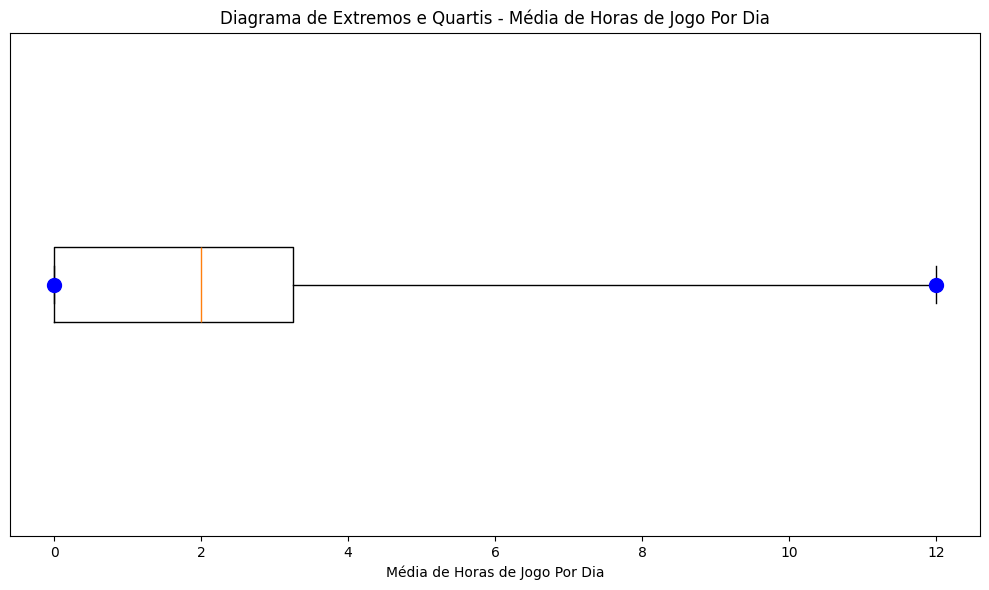

In [25]:
create_horizontal_boxplot(infoStudents, "Média de Horas de Jogo Por Dia")

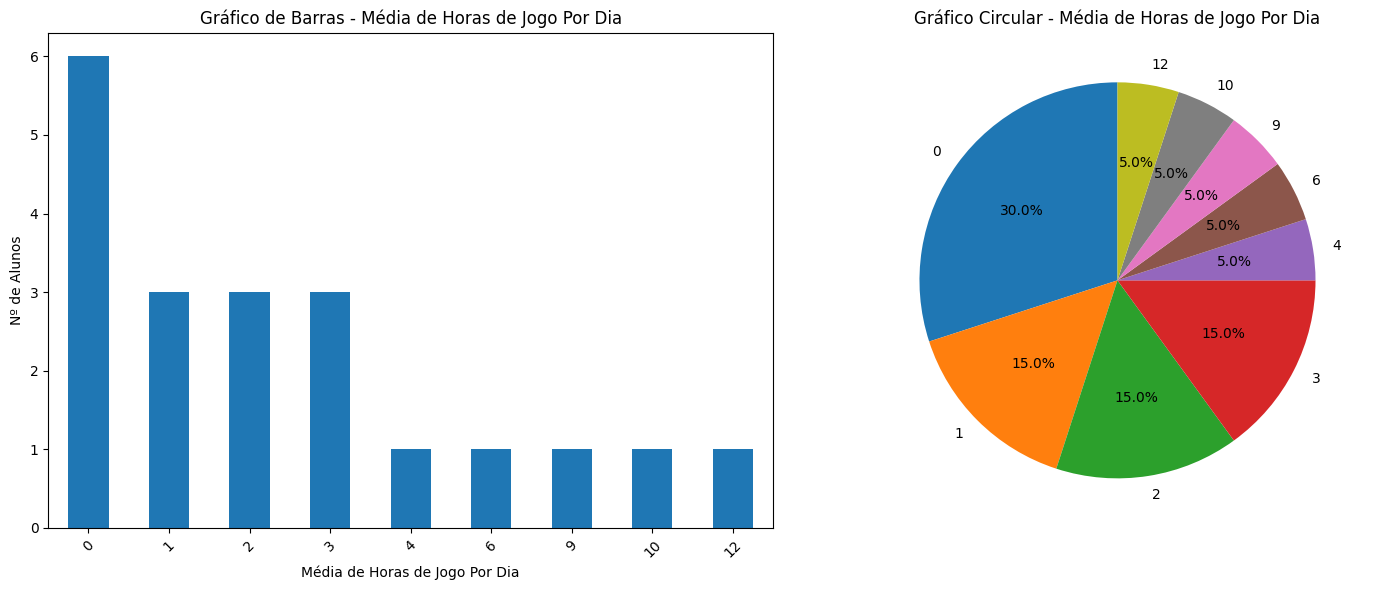

In [26]:
create_charts(infoStudents, "Média de Horas de Jogo Por Dia", yLabel="Nº de Alunos")

## Quantidade de Jogos Testados

In [27]:
pd.DataFrame(resultsFrequency["Total de Jogos Testados Este Ano"])

,Frequência Absoluta,Frequência Absoluta Acumulada,Frequência Relativa,Frequência Relativa Acumulada
Total de Jogos Testados Este Ano,,,,
0,2,2,0.10,0.10
1,4,6,0.20,0.30
2,1,7,0.05,0.35
3,3,10,0.15,0.50
4,1,11,0.05,0.55
5,2,13,0.10,0.65
10,1,14,0.05,0.70
12,2,16,0.10,0.80
23,1,17,0.05,0.85


*Total Frequência Absoluta*: 20

*Total Frequência Relativa*: 1

In [28]:
pd.DataFrame(statistic_results["Total de Jogos Testados Este Ano"])

,0
Média,14.4
Moda,1.0
Mediana,3.5
Q1 (25%),1.0
Q2 (50%),3.5
Q3 (75%),12.0
Mínimo,0.0
Máximo,120.0
Amplitude,120.0


Visto que os valores são bastante concentrados, existia uma distância muito acentuada entre os valores e o conjunto de valores únicos é reduzido, decidimos utilizar números inteiros em vez de intervalos, caso contrário existiriam muitos intervalos vazios. A média de 14,4 jogos testados durante este ano indica que os alunos testaram mais de 2 jogos por mês. No entanto, a mediana de 3,5 jogos mostra que metade da turma testou menos de 4 jogos, o que sugere que um pequeno grupo de alunos jogou um grande número de jogos. A moda de 1 jogo revela que é comum que os alunos testem pelo menos um jogo por ano.
A grande amplitude, de 0 a 120 jogos, indica que alguns alunos exploram muitos jogos, mas outros não testaram nenhum. Esta variação sugere diferentes níveis de interesse e envolvimento em jogos na turma TPSIP 11.23.

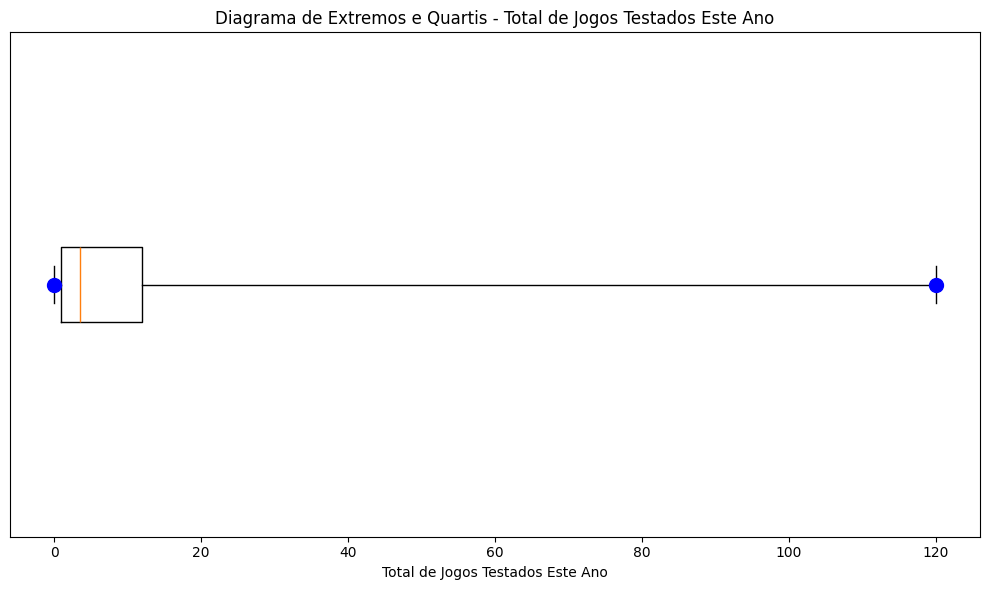

In [29]:
create_horizontal_boxplot(infoStudents, "Total de Jogos Testados Este Ano")

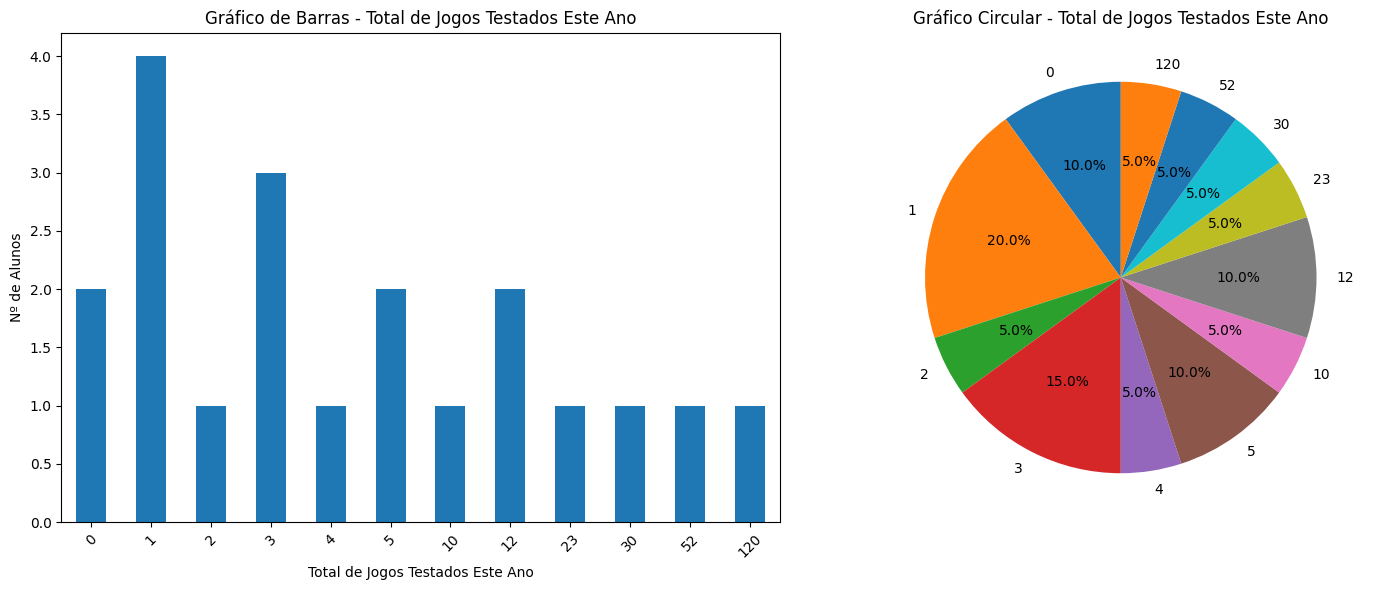

In [30]:
create_charts(infoStudents, "Total de Jogos Testados Este Ano", yLabel="Nº de Alunos")

## Género Favorito

In [31]:
pd.DataFrame(resultsFrequency["Género Favorito"])

,Frequência Absoluta,Frequência Absoluta Acumulada,Frequência Relativa,Frequência Relativa Acumulada
Género Favorito,,,,
ARCADE,1,1,0.05,0.05
FPS,8,9,0.40,0.45
LÓGICA,4,13,0.20,0.65
RPG,5,18,0.25,0.90
TERROR,2,20,0.10,1.00


*Total Frequência Absoluta*: 20

*Total Frequência Relativa*: 1

*Moda*: FPS

Os dados mostram que os jogos de FPS são os mais populares, preferidos por 40% dos alunos. Os jogos de RPG também têm uma presença significativa, com 25%. Jogos de lógica são escolhidos por 20% dos alunos, seguidos por jogos de terror (10%) e arcade (5%).


Esta distribuição indica uma preferência clara por jogos que oferecem ação e estratégia (FPS e RPG), jogos de lógica e terror também têm uma base considerável. Uma menor preferência por jogos de arcade pode sugerir que jogos mais modernos e complexos têm uma maior aderência.

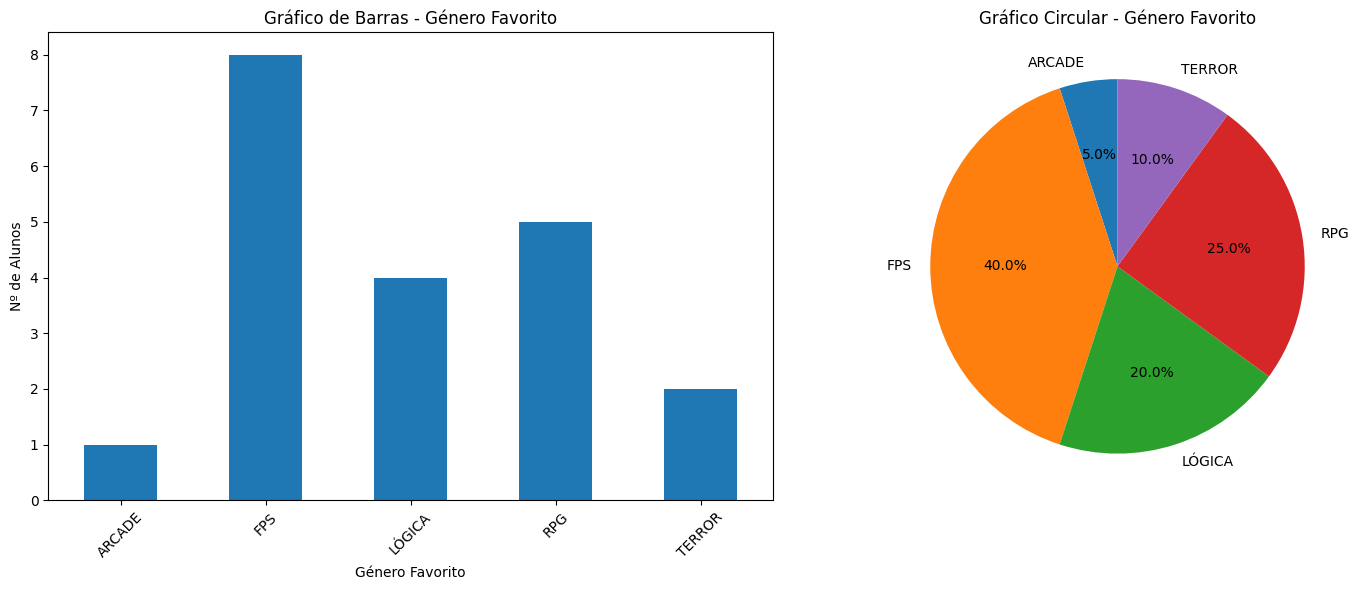

In [32]:
create_charts(infoStudents, "Género Favorito", yLabel="Nº de Alunos")

## Análise

As frequências relativas das horas de jogo diárias mostram que 30% dos alunos não jogam diariamente, enquanto que 45% jogam entre 1 e 3 horas por dia. Apenas uma pequena fração (15%) joga mais de 9 horas por dia.


Quanto à quantidade de jogos testados, a maioria dos alunos testou entre 0 e 5 jogos ao longo do ano. Apenas uma pequena fração testou uma quantidade significativamente maior de jogos (até 120), o que indica uma diversidade de comportamento em relação a experimentar jogos.

O género de jogo preferido pelos alunos é o FPS (40%), seguido de RPG (25%) e lógica (20%).

## Conclusão

A análise dos dados revela que a turma possui uma variada gama de comportamentos e preferências em relação a jogos. A maioria dos alunos joga de forma moderada, dedicando até 3,5 horas por dia aos jogos. O experimentar de jogos é comum, mas varia amplamente entre os alunos. Os jogos de FPS são os mais populares, seguidos por RPG e Lógica.


Estas informações podem ser úteis para entender os hábitos de jogo dos alunos, e permitem adaptar atividades e discussões sobre jogos de forma mais direcionada e eficaz.


## Trabalho Elaborado Por:

* Artur Santos
* Pedro Dias
* Vanessa Ferreira 